In [1]:
import xarray as xr
import scipy as sci
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import scipy.interpolate as sci
import datetime
import wavelet
from wavelet import compute_cwt
import matplotlib.ticker as ticker

In [2]:
home_dir='C:/Users/vavolk001/Desktop/climAPC/poster/'

#load our 3 indices next

In [3]:
# Download the data from the URL, 1st NAO index from NOAA CPC, daily 1948-present, based on EOFs
data = pd.read_csv(home_dir + "nao1.csv")
nao1 = data
nao1['timestamp'] = pd.to_datetime(nao1['timestamp'])

In [4]:
# 2nd NAO index from NCAR, Hurrell Station-Based Monthly Index, 1865-2022
# Load the data from the CSV file
data = pd.read_csv(home_dir + "n2.csv")
dat = data.melt(id_vars="YEAR", var_name="Month", value_name="Data")
dat["Month"] = dat["Month"].str.lower()
dat["timestamp"] = pd.to_datetime(dat["YEAR"].astype(str) + '-' + dat["Month"], format="%Y-%b")
nao2 = dat[["timestamp", "Data"]].copy()
nao2.columns = ["timestamp", "data"]
nao2 = nao2.sort_values("timestamp")
nao2 = nao2.iloc[:-3]
nao2 = nao2.reset_index(drop=True)

In [5]:
# 3rd NAO index from Climate Research Unit, University of East Anglia, also monthly, 1825-2022
# Citation: http://dx.doi.org/10.1002/(SICI)1097-0088(19971115)17:13%3C1433::AID-JOC203%3E3.0.CO;2-P
# Load the data from the CSV file
data = pd.read_csv(home_dir + "n3.csv")
dat = data.melt(id_vars="YEAR", var_name="Month", value_name="Data")
dat["Month"] = dat["Month"].str.lower()
dat["timestamp"] = pd.to_datetime(dat["YEAR"].astype(str) + '-' + dat["Month"], format="%Y-%b")
nao3 = dat[["timestamp", "Data"]].copy()
nao3.columns = ["timestamp", "data"]
nao3 = nao3.sort_values("timestamp")
nao3 = nao3.reset_index(drop=True)

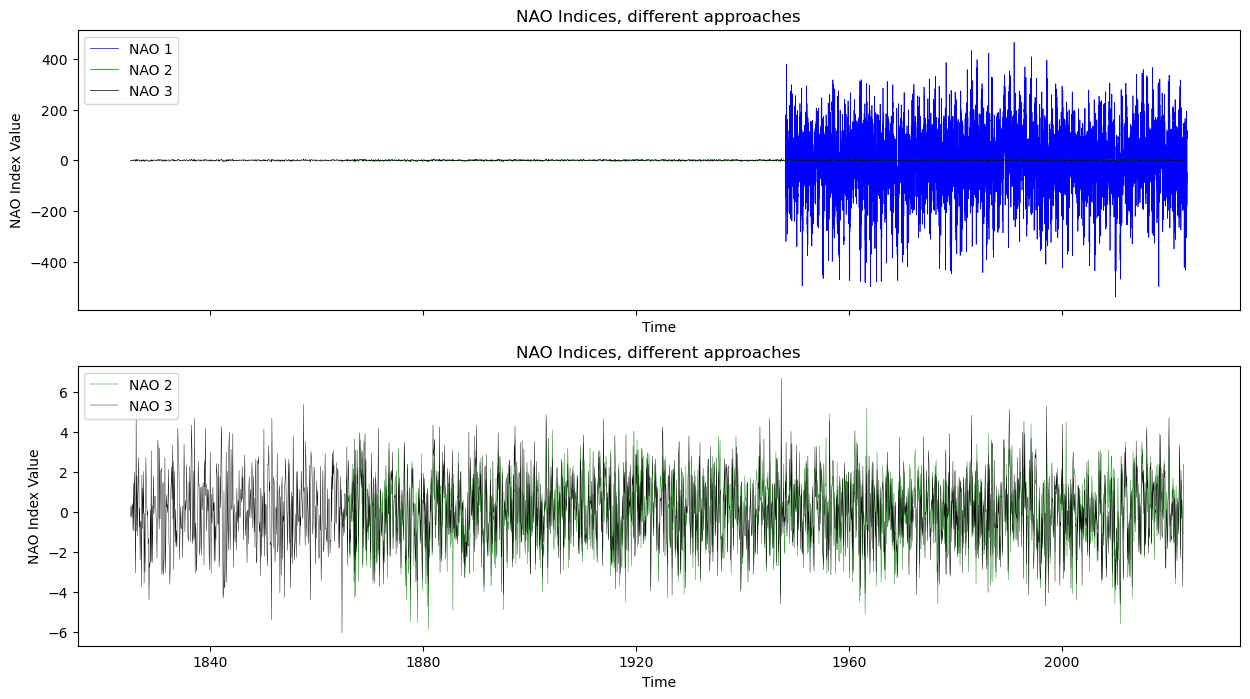

In [6]:
#plot all data together
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

ax1.plot(nao1.timestamp, nao1.value, label='NAO 1',color = 'blue',linewidth=0.5)
ax1.plot(nao2.timestamp, nao2.data, label='NAO 2',color = 'green',linewidth=0.5)
ax1.plot(nao3.timestamp, nao3.data, label='NAO 3',color = 'black',linewidth=0.5)

ax1.set_xlabel('Time')
ax1.set_ylabel('NAO Index Value')
ax1.set_title('NAO Indices, different approaches')
ax1.legend()
#plt.xticks(rotation=45)

ax2.plot(nao2.timestamp, nao2.data, label='NAO 2',color = 'green',linewidth=0.3)
ax2.plot(nao3.timestamp, nao3.data, label='NAO 3',color = 'black',linewidth=0.3)

ax2.set_xlabel('Time')
ax2.set_ylabel('NAO Index Value')
ax2.set_title('NAO Indices, different approaches')
ax2.legend(loc='upper left')

fig.savefig(os.path.join(home_dir,'allnao.jpg'))
plt.show()

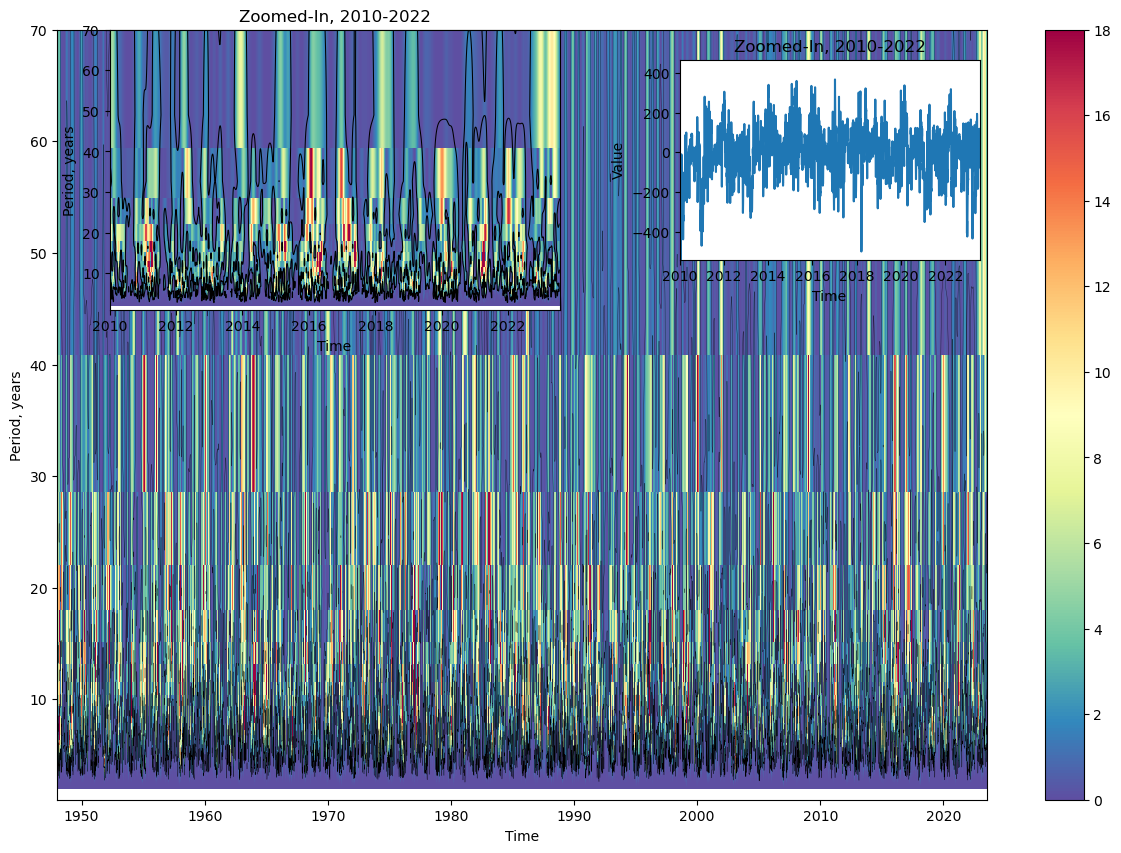

In [14]:
#Wavelet plotting

fig, ax = plt.subplots(figsize=(15, 10))
x = nao1.value
t = np.arange(len(x))
cwtm, cwtm_sig, freq = compute_cwt(x, t)

#ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.pcolormesh((t+1948*365)/365, 1/freq[1:], cwtm_sig[1:, :], cmap='Spectral_r',vmin=0, vmax=18)
plt.colorbar()
# add significance as countour
ap = plt.contour((t+1948*365)/365, 1/freq[1:], cwtm_sig[1:, :], [1], colors='k',linewidths=0.2, zorder=1)
ax.set_ylim(1, 70)
plt.xlabel('Time')
plt.ylabel('Period, years');

ax_zoom = fig.add_axes([0.54, 0.65, 0.2, 0.2])  # Define the position of the zoomed-in axes
ax_zoom.plot((t+1948*365)/365, x)
ax_zoom.set_xlim((2010*365)/365, (t[-1]+1948*365)/365)
ax_zoom.set_ylim(np.min(x), np.max(x))
ax_zoom.set_xlabel('Time')
ax_zoom.set_ylabel('Value')
ax_zoom.set_title('Zoomed-In, 2010-2022')

ax_wavelet = fig.add_axes([0.16, 0.6, 0.3, 0.28])  # Define the position of the wavelet transform axes
plt.pcolormesh((t[22630:]+1948*365)/365, 1/freq[1:], cwtm_sig[1:, 22630:], cmap='Spectral_r',vmin=0, vmax=18)
# Add significance as contour
plt.contour((t[22630:]+1948*365)/365, 1/freq[1:], cwtm_sig[1:, 22630:], [1], colors='k', linewidths=0.75, zorder=1)
ax_wavelet.set_ylim(1, 70)
ax_wavelet.set_xlabel('Time')
ax_wavelet.set_ylabel('Period, years')
ax_wavelet.set_title('Zoomed-In, 2010-2022')
fig.savefig(os.path.join(home_dir,'nao1.jpg'))

C:\Users\vavolk001\Desktop\Thesis\maps\wavelet.py:90: UserWarning: 5 outliers removed.
  warnings.warn(f"{n_outliers} outliers removed.")


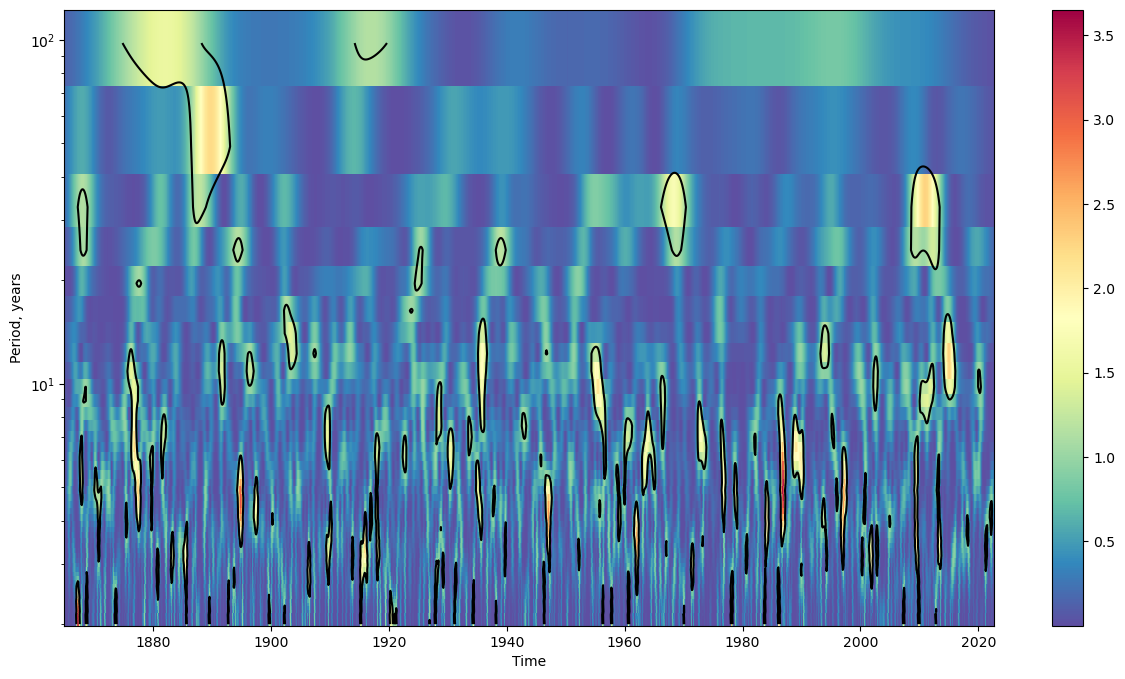

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
x2 = nao2.data
t2 = np.arange(len(x2))

cwtm2, cwtm_sig2, freq2 = compute_cwt(x2, t2)
ax.set_yscale('log')
plt.pcolormesh((t2+1865*12)/12, 1/freq2[1:], cwtm_sig2[1:, :], cmap='Spectral_r')
plt.colorbar()
# add significance as countour
plt.contour((t2+1865*12)/12, 1/freq2[1:], cwtm_sig2[1:, :], [1], colors='k', zorder=1)
plt.xlabel('Time')
plt.ylabel('Period, years');
fig.savefig(os.path.join(home_dir,'nao2.jpg'))

C:\Users\vavolk001\Desktop\Thesis\maps\wavelet.py:80: UserWarning: 1 infinite data points removed.
  warnings.warn(f"{n_infinite} infinite data points removed.")
C:\Users\vavolk001\Desktop\Thesis\maps\wavelet.py:90: UserWarning: 3 outliers removed.
  warnings.warn(f"{n_outliers} outliers removed.")


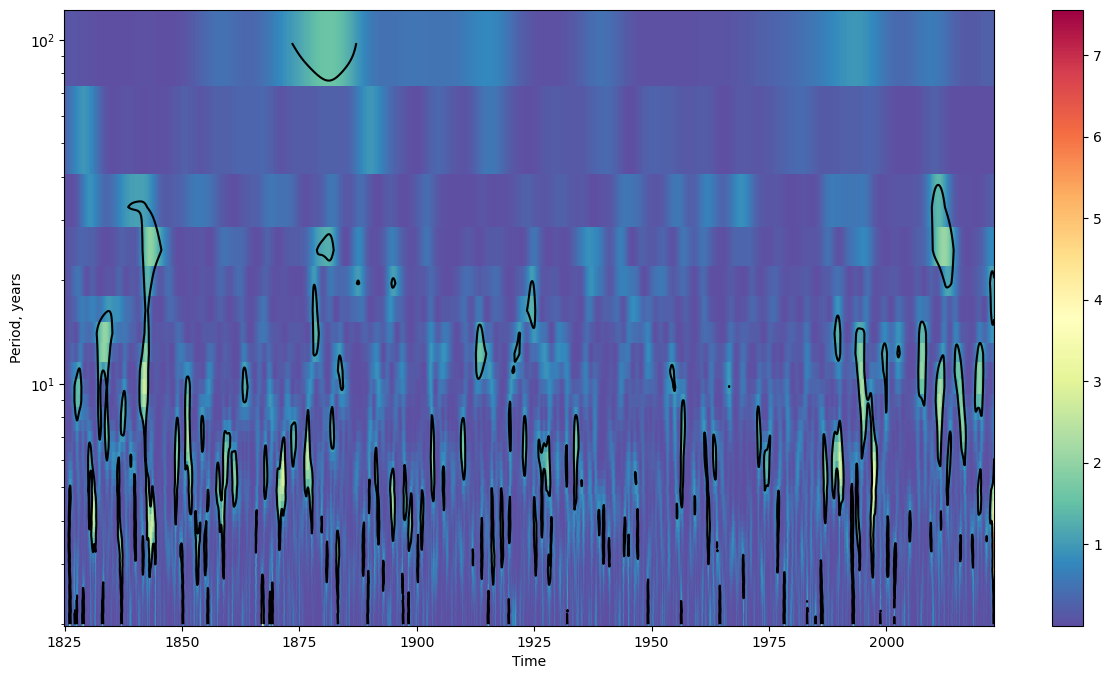

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
x3 = nao3.data
t3 = np.arange(len(x3))

cwtm3, cwtm_sig3, freq3 = compute_cwt(x3, t3)
ax.set_yscale('log')
plt.pcolormesh((t3+1825*12)/12, 1/freq3[1:], cwtm_sig3[1:, :], cmap='Spectral_r')
plt.colorbar()
# add significance as countour
plt.contour((t3+1825*12)/12, 1/freq3[1:], cwtm_sig3[1:, :], [1], colors='k', zorder=1)
plt.xlabel('Time')
plt.ylabel('Period, years');
fig.savefig(os.path.join(home_dir,'nao3.jpg'))